## Final Project
### DATA 620 - Web Analytics
### Group 3
+ Rajwant Mishra
+ Md. Jalal Uddin
+ Sarah Wigodsky

<b>Introduction</b>

A dataset of books about US politics published around the 2004 presidential election and sold by Amazon will be used to analyze the relationships between book buyers and the political views expressed in books.  The techniques of social network analysis will be employed to identify relationships between books bouhgt by the same buyers.  Sentiment analysis will be conducted to determine if there is a relationship between the political views expressed in the books and whether the title (or content as expressed in a summary) of the book is positive or negative.  Machine learning models will be run to predict whether the political views expressed in the book are liberal conservative or neutral.    

<b>Dataset</b>

The dataset is a gml file that contains the names of the books and lists links between books that were bought by the same buyer.  The dataset was complied by Valdis Krebs and can be found at http://www-personal.umich.edu/~mejn/netdata/

Nodes represent books about US politics sold by the online bookseller Amazon.com.  Edges represent frequent co-purchasing of books by the same buyers, as indicated by the "customers who bought this book also bought these other books" feature on Amazon.

Nodes have been given values "l", "n", or "c" to indicate whether they are "liberal", "neutral", or "conservative".  These alignments were assigned separately by Mark Newman based on a reading of the descriptions and reviews of the books posted on Amazon.

These data should be cited as V. Krebs, unpublished, http://www.orgnet.com/.

In [145]:
#import libraries
import networkx as nx
import matplotlib.pyplot as plot
import pandas as pd
import numpy as np
from nltk.corpus import stopwords as sw
import nltk
import string
import re

In [114]:
#load data
pol_books = nx.read_gml('polbooks.gml')

In [3]:
pol_books

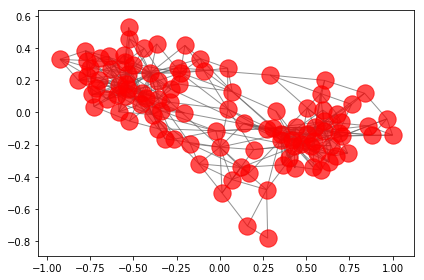

In [6]:
# Draw the graph adding alpha, removing labels, and softening edge color
nx.draw_networkx(pol_books,  alpha=0.7, with_labels=False, edge_color='.4')
plot.tight_layout();

The network graph above displays books that were bought by the same buyers.  There are two clusters that displays many connections between books bought by the same buyers. 

Full Network Considering Poltical Leanings <br> Legend
+ Liberal Books - Orange - 40.95%
+ Conservative Books - Blue - 46.67%
+ Neutral Books - Green - 12.38%
<img src="SNA_graph_cln2.png" width="800">

The graph above displays the network color coded by the political views expressed in the books.  The two clusters seen in the original network graph can now be identified as belonging to conservative books bought by the same buyers and liberal books bought by the same buyers.  Interestingly, the books designated as neutral largely span the space connecting the liberal-book cluster with the conservative-book cluster.  There are more books designated as conservative than books designated as liberal and many more partisan books than neutral books.

In [7]:
#number of nodes and edges
num_nodes = pol_books.number_of_nodes()
print ('The number of nodes: ' + str(num_nodes))
num_edges = pol_books.number_of_edges()
print ('The number of edges: ' + str(num_edges))

The number of nodes: 105
The number of edges: 441


This is a fairly small dataset, consisting of 105 political books.  There are 441 connections between books, indicating books that were bought by the same buyer.

### Degree Centrality

Degree centrality measures the number of nodes a given node is connected to.  In this case, a book's degree measures the number of books buyers of that book also bought.  A book with a high degree centrality indicates that a buyer is likely to buy that book as well as another book within the dataset.

In [115]:
#access party affiliation and convert from dictionary to data frame
party_affiliation = nx.get_node_attributes(pol_books,'value')
party_affiliation_df = pd.DataFrame([party_affiliation])
party_affiliation_df = party_affiliation_df.T
party_affiliation_df = party_affiliation_df.reset_index()
party_affiliation_df.columns = ["Book","Political_View"]
party_affiliation_df.head()

,Book,Political_View
0,1000 Years for Revenge,n
1,A National Party No More,c
2,Against All Enemies,l
3,All the Shah's Men,n
4,Allies,c


In [52]:
#Degree Centrality
df = pd.DataFrame(sorted(pol_books.degree, key=lambda x: x[1], reverse=True))
df.columns = ["Book","Degree"]
df = pd.merge(df,party_affiliation_df, on='Book')
df.head(10)

,Book,Degree,Political_View
0,A National Party No More,25,c
1,Off with Their Heads,25,c
2,Losing Bin Laden,23,c
3,Bushwhacked,23,l
4,American Dynasty,22,l
5,The Great Unraveling,21,l
6,Big Lies,21,l
7,The Price of Loyalty,20,l
8,Legacy,18,c
9,Deliver Us from Evil,18,c


There are two books with a degree centrality of 25.  A <i>National Party No More</i> and <i>Off with Their Heads</i> were both 
connected to 25 other books.  This means that a buyer who bought one of those books is likely have bought one of another 25 books in the dataset.  Both of those books are conservative books.  Out of the top 10 books with the highest degree value, 5 are conservatice and 5 are liberal. 

In [60]:
df.groupby('Political_View')['Degree'].mean()

Political_View
c    8.693878
l    8.837209
n    5.846154
Name: Degree, dtype: float64

The mean number of conservative books connected to other books is 8.7 and the mean number of liberal books connected to other books is 8.8.  This means that on average a user who bought a conservative or liberal book is likely to have bought one of 9 other books within the data set.  The mean number of neutral-leaning books connected to other books is 5.8.  A buyer who bought a neutral political book is likely to have bought one of 6 other books within the dataset. 

Network of the Books with Degree Centrality Greater than 18 
<br> Legend
+ Liberal Books - Orange 
+ Conservative Books - Blue 
+ Neutral Books - Green 
<img src="SNA_degreeAbove18_size.png" width="400">

The network graph above displays the connections between books with degree centralities greater than 18.  The size of the nodes is proportional to its degree.  These are books tended to be bought by people who bought at least one of 18 other political books in the dataset.  There are no neutral books that were bought that were linked to as many as 18 other books  Among the books that were most connected to other books, the liberal books are only connected to other liberal books and the conservative books are only connected to other conservative books.  There are about the same number of liberal and conservative books with the highest degree centralities.  

###### Lowest Degree Centrality

In [172]:
df.tail(10)

,Book,Degree,Political_View
95,Living History,4,l
96,We're Right They're Wrong,4,l
97,Buck Up Suck Up,4,l
98,Betrayal,3,c
99,Meant To Be,3,n
100,All the Shah's Men,3,n
101,Things Worth Fighting For,3,c
102,Freethinkers,3,l
103,Empire,3,n
104,The Future of Freedom,2,n


The lowest book with the lowest degree centality it <i>The Future of Freedom</i>, which was only bought buy a buyer who bought one other book.  Of the books with the lowest degree centalities, 4 are liberal, 2 are conservative and 4 are neutral.  Considering how few books are neutral, having 4 in the lowest 10 indicates that buyers who buy those books were less likely to buy another political book included in this list.

### Eigenvector Centrality
Eigenvector centrality measures the signficance of a book by taking into account the number of connections the book has and whether books they are connected to also are connected to a lot of books.  A book with a high eigenvector centrality measures how many other books buyers also bought as well as the significance of those other books that buyers bought.

In [136]:
#eigenvector centrality
eigen_centrality = nx.eigenvector_centrality_numpy(pol_books)

#convert to pandas dataframe, transpose, create index, rename columns 
eigen_df = pd.DataFrame([eigen_centrality])
eigen_df = eigen_df.T
eigen_df = eigen_df.reset_index()
eigen_df.columns = ["Book","Eigenvector_Centrality"]

#combine dataframe of eigenvectors with political leaning of book
eigen_df = pd.merge(eigen_df,party_affiliation_df, on='Book')

#sort dataframe by eigenvector centrality
eigen_df = eigen_df.sort_values(by='Eigenvector_Centrality', ascending=False)
eigen_df.head(10)

,Book,Eigenvector_Centrality,Political_View
16,Bushwhacked,0.296946,l
10,Big Lies,0.284135,l
6,American Dynasty,0.270838,l
87,The Price of Loyalty,0.258594,l
79,The Great Unraveling,0.254886,l
80,The Lies of George W. Bush,0.241950,l
104,Worse Than Watergate,0.237598,l
50,Plan of Attack,0.198185,n
42,Lies and the Lying Liars Who Tell Them,0.189236,l
2,Against All Enemies,0.186726,l


The book identified by networkx as having the highest eigenvector centrality is Bushwhacked.  Of the books with the 10 highest eigenvector centralities, 9 are liberal and 1 is neutral.  This is in contrast with the degree centrality, of which the 10 highest contained no neutral books and 5 conservative books.

In [139]:
#eigenvector centality calculated through Gephi
gephi_eigen = pd.read_csv('gephi_eigen.csv')
gephi_eigen.drop('Id', axis=1, inplace=True)
gephi_eigen.drop('timeset', axis=1, inplace=True)
gephi_eigen = gephi_eigen.sort_values(by='eigencentrality', ascending=False)
gephi_eigen.head(10)

,Label,value,eigencentrality
8,A National Party No More,c,1.000000
84,Bushwhacked,l,0.988461
12,Off with Their Heads,c,0.960619
73,Big Lies,l,0.945816
72,American Dynasty,l,0.907270
30,The Price of Loyalty,l,0.888066
66,The Great Unraveling,l,0.862778
3,Losing Bin Laden,c,0.836998
74,The Lies of George W. Bush,l,0.801199
75,Worse Than Watergate,l,0.788300


Gephi utilitizes a different algorithm for calculating eigenvector centrality and it finds a different set of books with the top 10 eigenvector values.  There are 3 conservative books and 7 liberal books with the highest eigenvector centrality according to Gephi.  This list more closely matches the list of books with the highest degree centrality.  The values calculated by Gephi are normalized so that the book with the highest eigenvector centrality is given a value of 1.

The calculation of eigenvector centrality from networkx and Gephi both are weighted much more heavily toward liberal books.  Liberal books have more influence than conservative books.

The following network graph displays the books with the top eigenvector centralities according to Gephi.

<br> Legend
+ Liberal Books - Orange 
+ Conservative Books - Blue 
+ Neutral Books - Green 
<img src="eigen_centrality2.png" width="400">

Among the books with the highest eigenvector centralities, the liberal books are only connected to other liberal books and conservative books are only connected to other conservative books.

##### Lowest Eigenvector Centrality

In [174]:
gephi_eigen.tail(10)

,Label,value,eigencentrality
68,Soft Power,l,0.113258
56,We Will Prevail,c,0.110635
59,Downsize This!,l,0.100030
61,Rush Limbaugh Is a Big Fat Idiot,l,0.092276
63,The Culture of Fear,l,0.091882
102,Buck Up Suck Up,l,0.083068
69,Colossus,n,0.079047
2,Charlie Wilson's War,c,0.075388
104,Empire,n,0.029077
103,The Future of Freedom,n,0.021140


The categories of books with the lowest degree centrality, is similar to the categories for the lowest eigenvector centralities.  There are 5 liberal books, 2 conservative books and 3 neutral books with the lowest eigenvector centralities.  These are the least influential books.

### Text Analysis of Book Summaries
- Book summaries and ratings were taken from Amazon.  These will be used to identify patterns between the political leaning of the book and the words in the summary.

In [164]:
#load data with book summary
book_summary_df = pd.read_csv('Book_Review.csv', encoding = 'unicode_escape')
book_summary_df = pd.DataFrame(book_summary_df)
book_summary_df = book_summary_df.drop('timeset ', axis=1)
book_summary_df.head()

,Id,Label,value,eigencentrality,Rating,Author,Summary
0,0,1000 Years for Revenge,n,0.155600,4.5,Peter Lance,1000 Years for Revenge is a groundbreaking inv...
1,1,Bush vs. the Beltway,c,0.130480,3.0,Laurie Mylroie,"As the dust settles over Baghdad, a leading ex..."
2,2,Charlie Wilson's War,c,0.075388,4.5,George Crile,The bestselling true story of a Texas congress...
3,3,Losing Bin Laden,c,0.836998,3.7,Richard Miniter,Journalist Rich Miniter uses his unparalleled ...
4,4,Sleeping With the Devil,n,0.213104,4.4,Robert Baer,Saudi Arabia is more and more an irrational s...


### Remove Punctuation and html Tags

In [165]:
#remove html tags
#remove punctuation
def remove_punct(text):
    text = re.sub('<[^<]+?>', '', text)
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

book_summary_df['summary_clean'] = book_summary_df['Summary'].apply(lambda x: remove_punct(x))
book_summary_df.head()

,Id,Label,value,eigencentrality,Rating,Author,Summary,summary_clean
0,0,1000 Years for Revenge,n,0.155600,4.5,Peter Lance,1000 Years for Revenge is a groundbreaking inv...,1000 Years for Revenge is a groundbreaking inv...
1,1,Bush vs. the Beltway,c,0.130480,3.0,Laurie Mylroie,"As the dust settles over Baghdad, a leading ex...",As the dust settles over Baghdad a leading exp...
2,2,Charlie Wilson's War,c,0.075388,4.5,George Crile,The bestselling true story of a Texas congress...,The bestselling true story of a Texas congress...
3,3,Losing Bin Laden,c,0.836998,3.7,Richard Miniter,Journalist Rich Miniter uses his unparalleled ...,Journalist Rich Miniter uses his unparalleled ...
4,4,Sleeping With the Devil,n,0.213104,4.4,Robert Baer,Saudi Arabia is more and more an irrational s...,Saudi Arabia is more and more an irrational s...


### Tokenization
- Break sentences up into individual words

In [168]:
#split sentences into words and convert capital letters into lowercase
def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

book_summary_df['summary_tokenized'] = book_summary_df['summary_clean'].apply(lambda x: tokenize(x.lower()))
book_summary_df.head()

,Id,Label,value,eigencentrality,Rating,Author,Summary,summary_clean,summary_tokenized
0,0,1000 Years for Revenge,n,0.155600,4.5,Peter Lance,1000 Years for Revenge is a groundbreaking inv...,1000 Years for Revenge is a groundbreaking inv...,"[1000, years, for, revenge, is, a, groundbreak..."
1,1,Bush vs. the Beltway,c,0.130480,3.0,Laurie Mylroie,"As the dust settles over Baghdad, a leading ex...",As the dust settles over Baghdad a leading exp...,"[as, the, dust, settles, over, baghdad, a, lea..."
2,2,Charlie Wilson's War,c,0.075388,4.5,George Crile,The bestselling true story of a Texas congress...,The bestselling true story of a Texas congress...,"[the, bestselling, true, story, of, a, texas, ..."
3,3,Losing Bin Laden,c,0.836998,3.7,Richard Miniter,Journalist Rich Miniter uses his unparalleled ...,Journalist Rich Miniter uses his unparalleled ...,"[journalist, rich, miniter, uses, his, unparal..."
4,4,Sleeping With the Devil,n,0.213104,4.4,Robert Baer,Saudi Arabia is more and more an irrational s...,Saudi Arabia is more and more an irrational s...,"[, saudi, arabia, is, more, and, more, an, irr..."


### Remove Stopwords

In [170]:
stopword = nltk.corpus.stopwords.words('english')
stopword.append('')
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]
    return text

book_summary_df['summary_nostop'] = book_summary_df['summary_tokenized'].apply(lambda x: remove_stopwords(x))

book_summary_df.head()

,Id,Label,value,eigencentrality,Rating,Author,Summary,summary_clean,summary_tokenized,summary_nostop
0,0,1000 Years for Revenge,n,0.155600,4.5,Peter Lance,1000 Years for Revenge is a groundbreaking inv...,1000 Years for Revenge is a groundbreaking inv...,"[1000, years, for, revenge, is, a, groundbreak...","[1000, years, revenge, groundbreaking, investi..."
1,1,Bush vs. the Beltway,c,0.130480,3.0,Laurie Mylroie,"As the dust settles over Baghdad, a leading ex...",As the dust settles over Baghdad a leading exp...,"[as, the, dust, settles, over, baghdad, a, lea...","[dust, settles, baghdad, leading, expert, iraq..."
2,2,Charlie Wilson's War,c,0.075388,4.5,George Crile,The bestselling true story of a Texas congress...,The bestselling true story of a Texas congress...,"[the, bestselling, true, story, of, a, texas, ...","[bestselling, true, story, texas, congressman,..."
3,3,Losing Bin Laden,c,0.836998,3.7,Richard Miniter,Journalist Rich Miniter uses his unparalleled ...,Journalist Rich Miniter uses his unparalleled ...,"[journalist, rich, miniter, uses, his, unparal...","[journalist, rich, miniter, uses, unparalleled..."
4,4,Sleeping With the Devil,n,0.213104,4.4,Robert Baer,Saudi Arabia is more and more an irrational s...,Saudi Arabia is more and more an irrational s...,"[, saudi, arabia, is, more, and, more, an, irr...","[saudi, arabia, irrational, state, place, spaw..."


### Stem Text in Summary
- remove suffixes from words

In [171]:
ps = nltk.PorterStemmer()
def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

book_summary_df['summary_stemmed'] = book_summary_df['summary_nostop'].apply(lambda x: stemming(x))

book_summary_df.head()

,Id,Label,value,eigencentrality,Rating,Author,Summary,summary_clean,summary_tokenized,summary_nostop,summary_stemmed
0,0,1000 Years for Revenge,n,0.155600,4.5,Peter Lance,1000 Years for Revenge is a groundbreaking inv...,1000 Years for Revenge is a groundbreaking inv...,"[1000, years, for, revenge, is, a, groundbreak...","[1000, years, revenge, groundbreaking, investi...","[1000, year, reveng, groundbreak, investig, wo..."
1,1,Bush vs. the Beltway,c,0.130480,3.0,Laurie Mylroie,"As the dust settles over Baghdad, a leading ex...",As the dust settles over Baghdad a leading exp...,"[as, the, dust, settles, over, baghdad, a, lea...","[dust, settles, baghdad, leading, expert, iraq...","[dust, settl, baghdad, lead, expert, iraq, tel..."
2,2,Charlie Wilson's War,c,0.075388,4.5,George Crile,The bestselling true story of a Texas congress...,The bestselling true story of a Texas congress...,"[the, bestselling, true, story, of, a, texas, ...","[bestselling, true, story, texas, congressman,...","[bestsel, true, stori, texa, congressman, secr..."
3,3,Losing Bin Laden,c,0.836998,3.7,Richard Miniter,Journalist Rich Miniter uses his unparalleled ...,Journalist Rich Miniter uses his unparalleled ...,"[journalist, rich, miniter, uses, his, unparal...","[journalist, rich, miniter, uses, unparalleled...","[journalist, rich, minit, use, unparallel, acc..."
4,4,Sleeping With the Devil,n,0.213104,4.4,Robert Baer,Saudi Arabia is more and more an irrational s...,Saudi Arabia is more and more an irrational s...,"[, saudi, arabia, is, more, and, more, an, irr...","[saudi, arabia, irrational, state, place, spaw...","[saudi, arabia, irrat, state, place, spawn, gl..."
